In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hollywood_movies = pd.read_csv("hollywood_movies.csv")

In [6]:
print(hollywood_movies.head(5))

   Year  exclude                                         Film  Lead Studio  \
0  2011      NaN                                      Average          NaN   
1  2011      NaN                             The Tree Of Life  Independant   
2  2011      NaN                            Midnight in Paris         Sony   
3  2011      NaN  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011      NaN                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1                      4.00           

In [7]:
excludes = hollywood_movies["exclude"]

In [8]:
excludes.value_counts()

Series([], Name: exclude, dtype: int64)

In [9]:
print(excludes.value_counts())

Series([], Name: exclude, dtype: int64)


In [10]:
hollywood_movies.drop(axis=1, labels="exclude", inplace=True)

In [11]:
print(hollywood_movies.head(5))

   Year                                         Film  Lead Studio  \
0  2011                                      Average          NaN   
1  2011                             The Tree Of Life  Independant   
2  2011                            Midnight in Paris         Sony   
3  2011  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1                      4.00                    93230.00           13.30   
2                

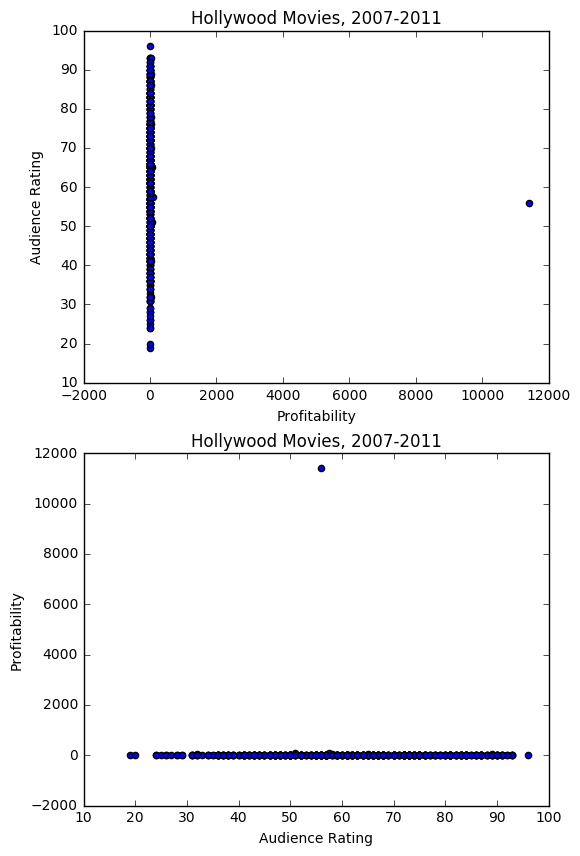

In [12]:
fig = plt.figure(figsize=(6,10))
top = fig.add_subplot(2,1,1)
top.scatter(hollywood_movies["Profitability"], hollywood_movies["Audience Rating"])
top.set_xlabel("Profitability")
top.set_ylabel("Audience Rating")
top.set_title("Hollywood Movies, 2007-2011")

bot = fig.add_subplot(2,1,2)
bot.scatter(hollywood_movies["Audience Rating"], hollywood_movies["Profitability"])
bot.set_xlabel("Audience Rating")
bot.set_ylabel("Profitability")
bot.set_title("Hollywood Movies, 2007-2011")

plt.show()

In [13]:
normal_movies = hollywood_movies[hollywood_movies["Film"] != "Paranormal Activity"]

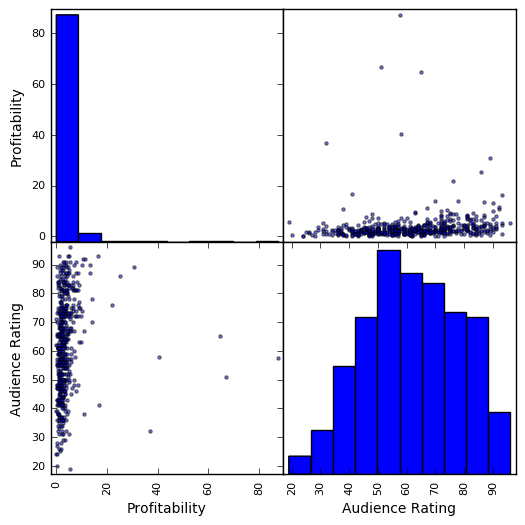

In [14]:
f = plt.figure(figsize=(6,6))
pd.scatter_matrix(normal_movies[["Profitability", "Audience Rating"]], figsize=(6,6))
plt.show()

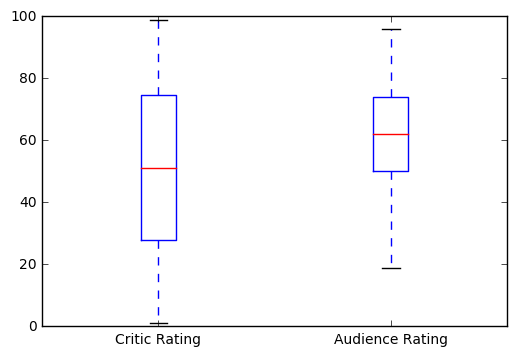

In [15]:
normal_movies[["Critic Rating", "Audience Rating"]].plot(kind="box")

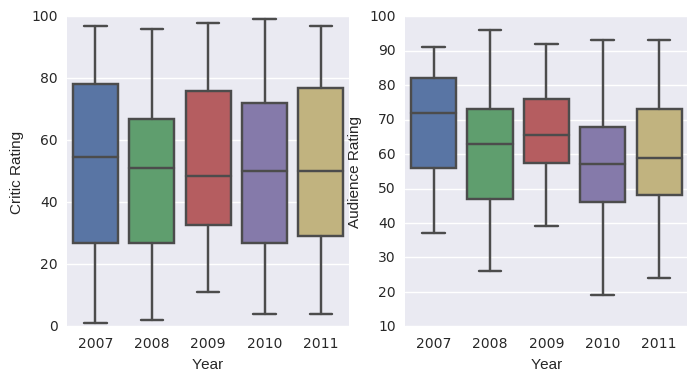

In [24]:
normal_movies = normal_movies.sort_values("Year")
fig = plt.figure(figsize=(8,4))
left = fig.add_subplot(1,2,1)
sns.boxplot(normal_movies["Year"], normal_movies["Critic Rating"], ax=left)

right = fig.add_subplot(1,2,2)
sns.boxplot(normal_movies["Year"], normal_movies["Audience Rating"], ax=right)

plt.show()

In [25]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
print(normal_movies["Profitable"].value_counts())

True     447
False     69
Name: Profitable, dtype: int64


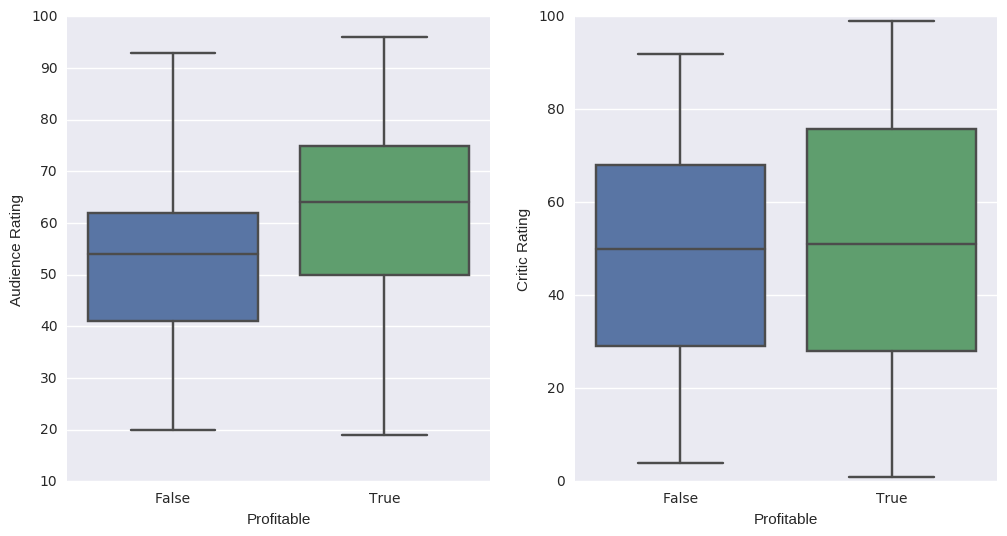

In [27]:
fig = plt.figure(figsize=(12,6))
left = fig.add_subplot(1,2,1)
right = fig.add_subplot(1,2,2)

sns.boxplot(normal_movies["Profitable"], normal_movies["Audience Rating"], ax=left)

sns.boxplot(normal_movies["Profitable"], normal_movies["Critic Rating"], ax=right)

plt.show()